In [1]:
import numpy as np 
import pandas as pd

In [2]:
df =pd.read_csv("./MNIST/mnist_train.csv")

In [3]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isna().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [5]:
df.shape

(60000, 785)

In [6]:
X= df.iloc[:,1:]
X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y =df.iloc[:,0]
Y

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
X_Train , X_Test, y_train ,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [10]:
standardScaler = StandardScaler()

In [11]:
X_Test.shape

(18000, 784)

In [12]:
X_Train =standardScaler.fit_transform(X_Train)
X_Test = standardScaler.transform(X_Test)

In [13]:
print(X_Train.shape)


(42000, 784)


In [14]:
print(X_Test.shape)

(18000, 784)


In [15]:
from sklearn.manifold import TSNE
import plotly.express as px
import os
os.environ["LOKY_MAX_CPU_COUNT"]="4" #No of cores in our system
tsne = TSNE(n_components=2, random_state=20)
projections = tsne.fit_transform(X_Train)

In [16]:
df_plot = pd.DataFrame({
    "x": projections[:, 0],
    "y": projections[:, 1],
    "label": y_train
})

fig = px.scatter(df_plot, x='x', y='y', color='label')
fig.show()

In [17]:
projections

array([[ -9.081985, -85.02561 ],
       [-37.721268,  33.238987],
       [-38.76494 , -16.376085],
       ...,
       [-61.811882,  27.332241],
       [-74.23567 , -60.41309 ],
       [ 12.589003,  41.305088]], shape=(42000, 2), dtype=float32)

In [18]:
#PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_Train)


In [20]:
pca.explained_variance_ratio_

array([0.056765  , 0.04136637])

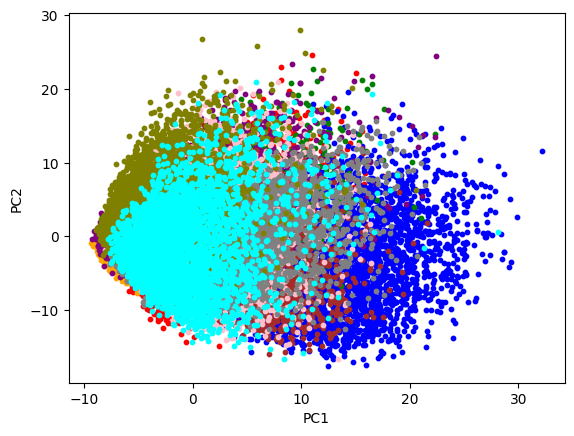

In [24]:
targets = Y.unique()
colors = ['red','blue','green','orange','purple','brown','pink','gray','olive','cyan']
for target, color in zip(targets,colors):
    indicesToKeep = y_train == target
    plt.scatter(X_pca[indicesToKeep, 0], X_pca[indicesToKeep, 1], c = color, s = 10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()